In [1]:
import re
import time
import pickle
import os
import numpy as np
import pandas as pd
from itertools import *
from sqlalchemy import create_engine
from sqlalchemy.pool import NullPool
from textwrap import dedent
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer, StandardScaler
from sklearn.feature_selection import VarianceThreshold
import datetime
import math
# from plotnine import *
from sklearn.metrics import brier_score_loss
from sklearn.utils import column_or_1d

In [2]:
df = pd.read_csv('../data/ca_cd_49_l2_2016_09_29_featureset_1336_scoring.csv', error_bad_lines=False)

In [3]:
df.columns.tolist()

['Unnamed: 0',
 'ispsa',
 'dwelling_type_single_family_dwelling_unit',
 'dwelling_type_multi_family_dwelling',
 'dwelling_type_null',
 'dwelling_unit_size_1_single_family_dwelling',
 'dwelling_unit_size_101',
 'dwelling_unit_size_50_100',
 'dwelling_unit_size_2_duplex',
 'dwelling_unit_size_20_49',
 'dwelling_unit_size_10_19',
 'dwelling_unit_size_3_triplex',
 'dwelling_unit_size_5_9',
 'dwelling_unit_size_4',
 'dwelling_unit_size_null',
 'estimated_income_amount',
 'hh_upscale_buyer',
 'hh_upscale_male_buyer',
 'hh_upscale_female_buyer',
 'hh_book_buyer',
 'hh_family_magazine',
 'hh_female_oriented_magazine',
 'hh_religious_magazine',
 'hh_gardening_magazine',
 'hh_culinary_interest_magazine',
 'hh_health_fitness_magazine',
 'hh_do_it_yourselfer_magazine',
 'hh_financial_magazine',
 'hh_religious_contributor',
 'hh_political_contributer',
 'hh_donates_environment_cause_u',
 'hh_donates_environment_cause_y',
 'hh_donates_environment_cause_null',
 'hh_donates_to_charity_y',
 'hh_donates

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325813 entries, 0 to 325812
Columns: 537 entries, Unnamed: 0 to lalvoterid
dtypes: float64(535), int64(1), object(1)
memory usage: 1.3+ GB


In [5]:
df.shape

(325813, 537)

In [6]:
df.groupby('home_purchase_price')['land_value'].mean()

home_purchase_price
0.0          1.633234e+05
20000.0      6.502632e+04
21000.0      5.569091e+04
22000.0      2.720930e+04
23000.0      4.838298e+04
24000.0      4.910714e+04
25000.0      7.414118e+04
26000.0      5.978378e+04
27000.0      4.198592e+04
28000.0      4.416883e+04
29000.0      2.715000e+04
30000.0      5.090361e+04
31000.0      1.095161e+05
32000.0      6.927692e+04
33000.0      2.880769e+04
34000.0      3.905970e+04
35000.0      5.383333e+04
36000.0      6.359016e+04
37000.0      4.301724e+04
38000.0      4.198333e+04
39000.0      8.581579e+04
40000.0      6.801064e+04
41000.0      5.250943e+04
42000.0      6.186667e+04
43000.0      3.559091e+04
44000.0      4.892063e+04
45000.0      6.288060e+04
46000.0      6.476000e+04
47000.0      5.168966e+04
48000.0      4.980392e+04
                 ...     
5190000.0    0.000000e+00
5200000.0    0.000000e+00
5250000.0    0.000000e+00
5350000.0    2.521000e+06
5430000.0    3.510000e+05
5500000.0    1.687000e+06
5520000.0    2.300

In [7]:
df.isnull().sum().tolist()

[0,
 12826,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 10137,
 157506,
 157506,
 157506,
 157506,
 157506,
 157506,
 157506,
 157506,
 157506,
 157506,
 157506,
 157506,
 152987,
 133386,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 157506,
 201295,
 157506,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 10096,
 12826,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 12826,
 12826,
 12826,
 12826,
 12826,
 12826,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,

In [8]:
print(df.describe())

          Unnamed: 0          ispsa  \
count  325813.000000  312987.000000   
mean   162906.000000       6.070019   
std     94054.255965       2.455549   
min         0.000000       0.000000   
25%     81453.000000       4.000000   
50%    162906.000000       7.000000   
75%    244359.000000       8.000000   
max    325812.000000       9.000000   

       dwelling_type_single_family_dwelling_unit  \
count                              325813.000000   
mean                                    0.547053   
std                                     0.497782   
min                                     0.000000   
25%                                     0.000000   
50%                                     1.000000   
75%                                     1.000000   
max                                     1.000000   

       dwelling_type_multi_family_dwelling  dwelling_type_null  \
count                        325813.000000       325813.000000   
mean                              0.219948     

(array([19166., 18520., 15820., 15759., 17217., 18309., 21594., 22922.,
        25908., 27382., 26597., 23969., 21894., 15523., 11182.,  8380.,
         6758.,  4692.,  2642.,  1041.]),
 array([18.  , 22.05, 26.1 , 30.15, 34.2 , 38.25, 42.3 , 46.35, 50.4 ,
        54.45, 58.5 , 62.55, 66.6 , 70.65, 74.7 , 78.75, 82.8 , 86.85,
        90.9 , 94.95, 99.  ]),
 <a list of 20 Patch objects>)

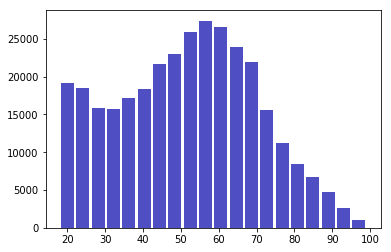

In [9]:
plt.hist(x=df['age'].dropna(), bins=20, color='#0504aa',
                            alpha=0.7, rwidth=0.85)

(array([ 5334.,  4296.,  4426.,  5110.,  4852.,  4629.,  9039.,  4151.,
         3978.,  3848.,  3843.,  3851.,  7865.,  4043.,  4235.,  4357.,
         4347.,  4278.,  4530.,  8950.,  4829.,  4746.,  5142.,  5592.,
         6114., 11658.,  5620.,  5644.,  6042.,  6370.,  6741., 13671.,
         6945.,  6748.,  6773.,  6857.,  6727.,  6450., 13010.,  6153.,
         5798.,  5571.,  5642.,  5492., 10760.,  4100.,  3809.,  4000.,
         3614.,  3100.,  5488.,  2594.,  2227.,  2148.,  2081.,  1924.,
         1830.,  3341.,  1587.,  1426.,  1282.,  1069.,   915.,  1606.,
          600.,   436.,   416.,   243.,   173.,   209.]),
 array([18.        , 19.15714286, 20.31428571, 21.47142857, 22.62857143,
        23.78571429, 24.94285714, 26.1       , 27.25714286, 28.41428571,
        29.57142857, 30.72857143, 31.88571429, 33.04285714, 34.2       ,
        35.35714286, 36.51428571, 37.67142857, 38.82857143, 39.98571429,
        41.14285714, 42.3       , 43.45714286, 44.61428571, 45.77142857,
 

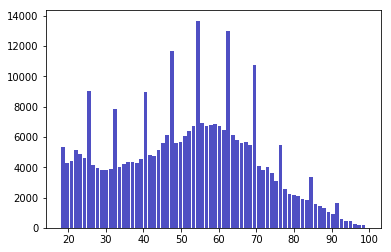

In [10]:
plt.hist(x=df['age'].dropna(), bins=70, color='#0504aa',
                            alpha=0.7, rwidth=0.85)

(array([26631., 54672., 73055., 63939., 47468., 20938.,  4643., 24330.]),
 array([  6000.,  36500.,  67000.,  97500., 128000., 158500., 189000.,
        219500., 250000.]),
 <a list of 8 Patch objects>)

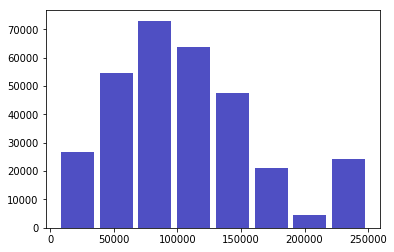

In [11]:
plt.hist(x=df['estimated_income_amount'].dropna(), bins=8, color='#0504aa',
                            alpha=0.7, rwidth=0.85)

(array([249899.,  75914.]),
 array([0. , 0.5, 1. ]),
 <a list of 2 Patch objects>)

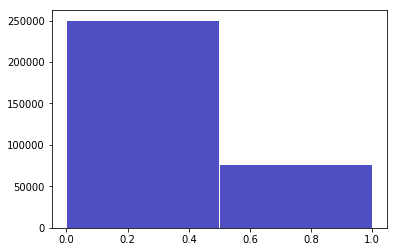

In [12]:
plt.hist(x=df['dwelling_type_null'].dropna(), bins=2, color='#0504aa',
                            alpha=0.7, rwidth=0.99)

(array([168307., 157506.]),
 array([0. , 0.5, 1. ]),
 <a list of 2 Patch objects>)

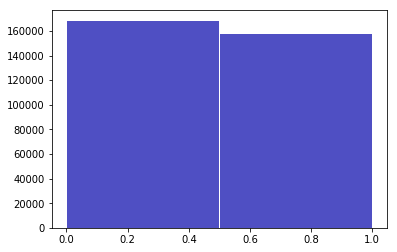

In [13]:
plt.hist(x=df['hh_computer_owner_null'].dropna(), bins=2, color='#0504aa',
                            alpha=0.7, rwidth=0.99)

/home/marzuqkhan/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


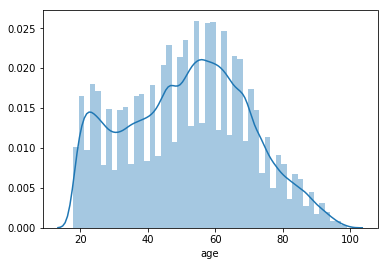

In [14]:
sns.distplot(df['age'].dropna())

In [15]:
print(df['cd_49'].describe())

count    325813.0
mean          1.0
std           0.0
min           1.0
25%           1.0
50%           1.0
75%           1.0
max           1.0
Name: cd_49, dtype: float64


In [18]:
import statsmodels.api as sm
model = sm.formula.glm("voted_18g ~ home_purchase_price + age + land_value + estimated_home_value + estimated_median_income",
                       family=sm.families.Binomial(), data=df).fit()
print(model.summary())
#Why is home_purchase_price insignicant here?

                 Generalized Linear Model Regression Results                  
Dep. Variable:              voted_18g   No. Observations:               165276
Model:                            GLM   Df Residuals:                   165270
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -47993.
Date:                Mon, 04 Mar 2019   Deviance:                       95986.
Time:                        12:33:03   Pearson chi2:                 1.44e+05
No. Iterations:                     6   Covariance Type:             nonrobust
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -6.3420      0.050   -125.889      0.000      -6.441      -6.243
home_purchase

In [19]:
import statsmodels.api as sm
model = sm.formula.glm("voted_18g~hh_upscale_buyer+hh_upscale_male_buyer+hh_upscale_female_buyer+hh_book_buyer+hh_family_magazine+hh_female_oriented_magazine+hh_religious_magazine+hh_gardening_magazine+hh_culinary_interest_magazine+hh_health_fitness_magazine+hh_do_it_yourselfer_magazine+hh_financial_magazine+hh_religious_contributor+hh_political_contributer+hh_donates_environment_cause_u+hh_donates_environment_cause_y+hh_donates_environment_cause_null+hh_donates_to_charity_y+hh_donates_to_charity_u+hh_donates_to_charity_null+hh_presence_of_prem_cred_crd_u+hh_presence_of_prem_cred_crd_y+hh_presence_of_prem_cred_crd_null+hh_computer_owner_y+hh_computer_owner_u+hh_computer_owner_null",
                       family=sm.families.Binomial(), data=df).fit()
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              voted_18g   No. Observations:               168307
Model:                            GLM   Df Residuals:                   168288
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -51805.
Date:                Mon, 04 Mar 2019   Deviance:                   1.0361e+05
Time:                        12:36:52   Pearson chi2:                 1.66e+05
No. Iterations:                   100   Covariance Type:             nonrobust
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                         -1.374e+11   4.52e+11     -0.304      0.761   -1.02

/home/marzuqkhan/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/home/marzuqkhan/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/marzuqkhan/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/marzuqkhan/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [20]:
model = sm.formula.glm("voted_18g~hh_upscale_buyer+hh_upscale_male_buyer+hh_family_magazine+hh_female_oriented_magazine+hh_gardening_magazine+hh_health_fitness_magazine+hh_financial_magazine+hh_political_contributer+hh_presence_of_prem_cred_crd_null+hh_computer_owner_null",
                       family=sm.families.Binomial(), data=df).fit()
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              voted_18g   No. Observations:               168307
Model:                            GLM   Df Residuals:                   168298
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -52241.
Date:                Mon, 04 Mar 2019   Deviance:                   1.0448e+05
Time:                        12:41:11   Pearson chi2:                 1.65e+05
No. Iterations:                     5   Covariance Type:             nonrobust
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -2.5013      0.011   -230.759      0.000      -2

In [22]:
df_by1=df.sort_values(by ='hh_political_contributer', ascending=False)
df_by1

,Unnamed: 0,ispsa,dwelling_type_single_family_dwelling_unit,dwelling_type_multi_family_dwelling,dwelling_type_null,dwelling_unit_size_1_single_family_dwelling,dwelling_unit_size_101,dwelling_unit_size_50_100,dwelling_unit_size_2_duplex,dwelling_unit_size_20_49,...,age_squared,age_cubed,age_null,age_18_34,age_35_54,age_55_plus,birth_date_offset,calculated_reg_date_offset,official_reg_date_offset,lalvoterid
275743,275743,9.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,5041.0,357911.0,0.0,0.0,0.0,1.0,25998.0,8588.0,8588.0,LALCA23424655
34707,34707,7.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,6241.0,493039.0,0.0,0.0,0.0,1.0,28879.0,4880.0,4880.0,LALCA23621480
189458,189458,8.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,4900.0,343000.0,0.0,0.0,0.0,1.0,25556.0,4404.0,4404.0,LALCA23380571
225389,225389,NaN,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,4624.0,314432.0,0.0,0.0,0.0,1.0,24798.0,13061.0,4404.0,LALCA24393342
309131,309131,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3025.0,166375.0,0.0,0.0,0.0,1.0,20149.0,7338.0,202.0,LALCA400298593
247973,247973,6.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,5329.0,389017.0,0.0,0.0,0.0,1.0,26795.0,7748.0,2455.0,LALCA17668952
16958,16958,8.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,4761.0,328509.0,0.0,0.0,0.0,1.0,25202.0,7671.0,2661.0,LALCA18958668
175079,175079,8.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,4225.0,274625.0,0.0,0.0,0.0,1.0,23988.0,8066.0,2846.0,LALCA18609779
71656,71656,4.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,2025.0,91125.0,0.0,0.0,1.0,0.0,16571.0,866.0,200.0,LALCA452914263
171933,171933,7.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,7569.0,658503.0,0.0,0.0,0.0,1.0,31878.0,8958.0,8958.0,LALCA18129616


In [24]:
model = sm.formula.glm("voted_18g~ethnicity_european+ethnicity_likely_african_american+ethnicity_hispanic_and_portuguese+ethnicity_other+ethnicity_east_and_south_asian+ethnicity_null",
                       family=sm.families.Binomial(), data=df).fit()
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              voted_18g   No. Observations:               325813
Model:                            GLM   Df Residuals:                   325807
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -91003.
Date:                Mon, 04 Mar 2019   Deviance:                   1.8201e+05
Time:                        13:36:49   Pearson chi2:                 3.24e+05
No. Iterations:                   100   Covariance Type:             nonrobust
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                         -4.899e+10    6.3e+10     -0.777      0.437   -1.73

In [25]:
model = sm.formula.glm("voted_18g~religion_protestant+religion_catholic+religion_jewish+religion_christian+religion_eastern_orthodox+religion_buddhist+religion_islamic+religion_hindu+religion_greek_orthodox+religion_shinto+religion_lutheran+religion_mormon+religion_sikh+religion_null",
                       family=sm.families.Binomial(), data=df).fit()
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              voted_18g   No. Observations:               325813
Model:                            GLM   Df Residuals:                   325799
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -90374.
Date:                Mon, 04 Mar 2019   Deviance:                   1.8075e+05
Time:                        13:44:54   Pearson chi2:                 3.22e+05
No. Iterations:                   100   Covariance Type:             nonrobust
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                 -9.316e+10   5.06e+10     -1.840      0.066   -1.92e+11    6.09e+09
religio

In [26]:
model = sm.formula.glm("voted_18g~occupation_industry_other+occupation_industry_medical+occupation_industry_management+occupation_industry_clericaloffice+occupation_industry_manufacturing+occupation_industry_financial_services+occupation_industry_skilled_trades+occupation_industry_education+occupation_industry_military+occupation_industry_computer_professional+occupation_industry_legal+occupation_industry_engineering+occupation_industry_civil_servant+occupation_industry_food_services+occupation_industry_other_other+occupation_industry_null",
                       family=sm.families.Binomial(), data=df).fit()
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              voted_18g   No. Observations:               325813
Model:                            GLM   Df Residuals:                   325796
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -90754.
Date:                Mon, 04 Mar 2019   Deviance:                   1.8151e+05
Time:                        13:58:00   Pearson chi2:                 3.26e+05
No. Iterations:                     6   Covariance Type:             nonrobust
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                    -1.9459      0.223     -